# Principal Components Regression (PCR)

For our initial example, we'll work with the Iris dataset and perform PCR using SciKit Learn. We'll follow that up with PCA visualization. 

For the following tutorial, we will be working with the famous “Iris” dataset that has been deposited on the UCI machine learning repository 
(https://archive.ics.uci.edu/ml/datasets/Iris).

The iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset are:

- Iris-setosa (n=50)
- Iris-versicolor (n=50)
- Iris-virginica (n=50)

And the four features of in Iris dataset are:

- sepal length in cm
- sepal width in cm
- petal length in cm
- petal width in cm

### Performing PCA using Scikit-Learn is a three-step process:

1. Initialize the PCA class by passing the number of components to the constructor and pulling out our best prinicipal components. 
2. Call the fit and then transform methods to project our transformed coefficients back onto our original dataset. 
3. Perform least squares regression on the transformed dataset. 

### Import and Prep Dataset

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# loading data with sci-kit learn
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

In [2]:
# features
X[:5]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6]])

In [3]:
# targets
y[:5]

array([0, 0, 0, 0, 0])

### Let's load it again with pandas to view the manual procedure

In [4]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal_length','sepal_width','petal_length',
                             'petal_width','target'])

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# remove rows that contain null values
df = df.dropna(how="any") 

In [7]:
df.target.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
### Encode target variables
encoding_dict = {"Iris-setosa":0,
                'Iris-versicolor':1,
                'Iris-virginica':2}
df["target"] = df.target.replace(encoding_dict)

In [9]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
# split data into features and targets
X = df.drop("target", axis=1).values # features
y = df[["target"]].values # targets

We've now created a 50×4  matrix where the columns are the different features, and every row represents a separate flower sample. Each sample row x can be pictured as a 4-dimensional vector: 


In [11]:
%%latex

x^t = \begin{pmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \end{pmatrix} = \begin{pmatrix} \text{sepal length} \\ \text{sepal width} \\\text{petal length} \\ \text{petal width} \end{pmatrix}

<IPython.core.display.Latex object>

We can quickly plot relationships between features and see that there is some colinearity between variables. 

Text(0.5,1,'Examining Colinearity')

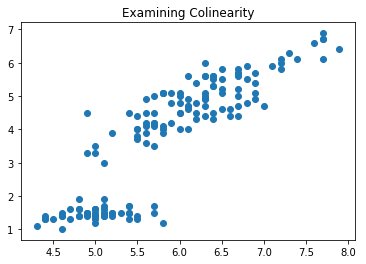

In [12]:
plt.scatter(X[:, 0], X[:, 2])
plt.title("Examining Colinearity")

## Scaling our data
Before we can perform PCA, we need to scale our data by subtracting the mean from each measurement and making the variance more uniform across the dataset (mean=0, variance=1). 

We can do this by importing sklearn's StandardScaler method and applying this only to the features. StandarScaler by default scales your values to have a mean of 0 and standard deviation of 1. 

In [13]:
from sklearn.preprocessing import StandardScaler
# Standardizing the features
X_scaled = StandardScaler().fit_transform(X)

We can see the effects of this scaling when comparing the data to our original feature set: 

In [14]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [15]:
X_scaled[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

## PCA Transformation
Now that we've scaled our model, we can perform Principle Component Analysis on our data to transform our data into the components that maximize variance using sklearn's decomposition.PCA package. Since there are only four features in our data, let's try PCA with 2 components. 

In [16]:
from sklearn.decomposition import PCA

# we setup our model and number of components
pca2 = PCA(n_components=2)

# we fit and transform the model to our scaled data
principalComponents = pca2.fit_transform(X_scaled)

# we create a dataframe for easier graphing
pca2_df = pd.DataFrame(data = principalComponents,
             columns = ['PC1', 'PC2'])

In [17]:
# now let's match these back to our original targets
finalDf2 = pd.concat([df[["target"]], pca2_df], axis = 1)
finalDf2.head()

,target,PC1,PC2
0,0,-2.264542,0.505704
1,0,-2.086426,-0.655405
2,0,-2.367950,-0.318477
3,0,-2.304197,-0.575368
4,0,-2.388777,0.674767


### Plot results
Let's view the projections: 

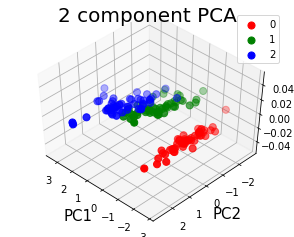

In [18]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1,2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf2['target'] == target
    ax.scatter(finalDf2.loc[indicesToKeep, 'PC1']
               , finalDf2.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

We've tried PCA with two components.Lets' see if it improves with 3 components. 

In [19]:
from sklearn.decomposition import PCA

# we setup our model and number of components
pca3 = PCA(n_components=3)

# we fit and transform the model to our scaled data
PC3 = pca3.fit_transform(X_scaled)

# we create a dataframe for easier graphing
pca3_df = pd.DataFrame(data = PC3,
             columns = ['PC1', 'PC2', 'PC3'])

# now let's match these back to our original targets
finalDf3 = pd.concat([df[["target"]], pca3_df], axis = 1)
finalDf3.head()

,target,PC1,PC2,PC3
0,0,-2.264542,0.505704,-0.121943
1,0,-2.086426,-0.655405,-0.227251
2,0,-2.367950,-0.318477,0.051480
3,0,-2.304197,-0.575368,0.098860
4,0,-2.388777,0.674767,0.021428


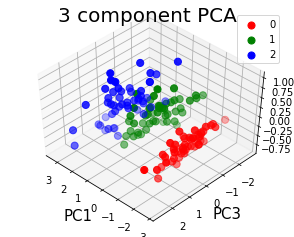

In [20]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_ylabel('PC3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
targets = [0,1,2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf3['target'] == target
    ax.scatter(finalDf3.loc[indicesToKeep, 'PC1']
               , finalDf3.loc[indicesToKeep, 'PC2']
               , finalDf3.loc[indicesToKeep, 'PC3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

We can see from above that when we use three components instead of 2, we have better separation of the Iris types. 

### Analyzing Results
We can pull out the relevant information from our PCA model attributes: 

In [21]:
# view the principle component values (maximum variance in the data), one PC per row
pca3.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577],
       [-0.72101681,  0.24203288,  0.14089226,  0.6338014 ]])

In [22]:
# actual variance explained by the model for each compoment, one PC per column
pca3.explained_variance_

array([2.93035378, 0.92740362, 0.14834223])

In [23]:
# view as percentage explained by each component
pca3.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832])

Let's compare the variance explained by 2 and 3 components. 

In [24]:
ttl_variance = sum(pca3.explained_variance_ratio_)
"Variance explained by 3 components: " + str(round(ttl_variance,2) * 100) + "%"

'Variance explained by 3 components: 99.0%'

In [25]:
"Variance explained by 2 components: " + str(round(sum(pca2.explained_variance_ratio_),2) * 100) + "%"

'Variance explained by 2 components: 96.0%'

Now we can use seaborn to create a scree plot that plots the variance explained by each component. 

In [26]:
pc_df = pd.DataFrame({'var':pca3.explained_variance_ratio_,
             'PC':['PC1','PC2', 'PC3']})

pc_df.head()

,var,PC
0,0.727705,PC1
1,0.230305,PC2
2,0.036838,PC3


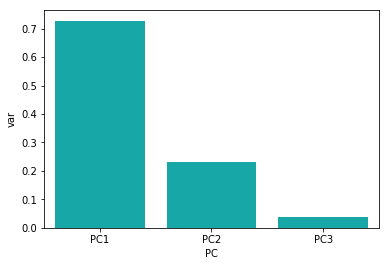

In [27]:
import seaborn as sns

sns.barplot(x='PC',y="var", 
           data=pc_df, color="c");

It's clear to see that the first component chosen explaines most of the variance, and how little the third component explains. m

## Principle Components Regression
Now that we've learned how to perform PCA, we can use our transformed results for linear regression: 

### Unaltered Iris Dataset
First we'll reload our dataset using SciKit learn and split it into training and test sets. 

In [28]:
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score

# loading data with sci-kit learn
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

# split our original data into training and test sets
X_train, X_test , y_train, y_test = model_selection.train_test_split(X, y, 
                                                    test_size=0.2, random_state=1)

### Scale the dataset
Before we can perform PCA, we need to apply the scaling to both the training and testing features, but not to the targets. 

In [29]:
from sklearn.preprocessing import StandardScaler

# instantiate scaling model
scaler = StandardScaler()

# Fit on training set only
scaler.fit(X_train)

# Apply transform to both the training set and the test set features
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

Now that we've scaled our data, we can run PCA. 

### 2 Component PCA
First we have to use PCA on the scaled data to pull out the top 2 components: 

In [30]:
# instantiate our model
pca2_scaled = PCA(n_components=2)

# fit the model to our data
pca2_scaled.fit(scaled_X_train)

# map the transformation onto our data
pca2_x_train = pca2_scaled.transform(scaled_X_train)
pca2_x_test = pca2_scaled.transform(scaled_X_test)

### 2 component PCR
Now we can use the PCA transformed data to run regression on the data transformed by the top two components: 

In [32]:
# instantiate linear model
pca2_regr = linear_model.LinearRegression() 
 
# Train the model using the scaled training sets
pca2_regr.fit(pca2_x_train,y_train)

# Make predictions using the scaled testing set
pca2_y_pred = pca2_regr.predict(pca2_x_test)

# score the model using scaled Rsquared
pca2_r_squared = pca2_regr.score(pca2_x_test, y_test) * 100

# The coefficients
print('Coefficients: \n', pca2_regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, pca2_y_pred))
# Explained variance score: 1 is perfect prediction
print("{}% of the variability in Y can be explained by X.".format(pca2_r_squared))

Coefficients: 
 [-0.61142117  0.26226084]
Mean squared error: 0.08
85.79180471263096% of the variability in Y can be explained by X.


## How to choose the right number of components? 
This is very easy in SciKit Learn. We can alter our PCA model object to give us back the number of components that explains X amount of variability instead of just asking back for a number of components, as follows: 
`PCA(.95)` will give us back the number of components needed to explain 95% of the variance. 


## Further Reading
Here are a few more articles on PCA and PCR that you might find useful: 

- [PCA using Python (scikit-learn)](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60)
- [An online lab using PCR](http://www.science.smith.edu/~jcrouser/SDS293/labs/lab11-py.html)
- [Another approach to choosing the right number of components](https://towardsdatascience.com/an-approach-to-choosing-the-number-of-components-in-a-principal-component-analysis-pca-3b9f3d6e73fe)
    